In [60]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision.transforms import transforms
from torchvision.models import resnet50
from PIL import Image
import pandas as pd
import os
from torchvision.models.resnet import ResNet50_Weights
from tqdm import tqdm
import numpy as np

import sklearn
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:

model=torchvision.models.resnet50(weights=ResNet50_Weights.DEFAULT) #change weights to my finetuned
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs,3)
model.load_state_dict(torch.load("/Users/kunkerdthaisong/cils/flooded_road/exp01.pt"))
model.eval() #like with torch.no_grad()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [23]:
class CustomDataset(Dataset):
    def __init__(self, df=pd.DataFrame(), transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        img_name =self.df.iloc[index, 1]
        image = Image.open(img_name)
        label = int(self.df.iloc[index, 2])

        if self.transform:
            image = self.transform(image)

        return image, label

In [24]:
test_df=pd.read_csv("/Users/kunkerdthaisong/cils/test.csv")

In [25]:
transform = transforms.Compose([
            transforms.Resize((224,224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

test_dataset = CustomDataset(test_df, transform=transform)

In [26]:
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

In [33]:
pred=[]
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs, labels
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        pred.append(np.asarray(predicted.squeeze(0)))

In [45]:
n=0
x=pred[0]
while n<len(pred)-1:
    x=np.concatenate((x,pred[n+1]), axis=None)
    n+=1
x

array([2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 1, 2, 0, 2, 2, 1, 2, 0])

(18,)

In [47]:
test_df["pred"]=x

In [55]:
test_df,accuracy_score(test_df["class"],test_df["pred"])

(    Unnamed: 0                                               path  class  pred
 0            0  /Users/kunkerdthaisong/cils/train_test_flood_i...      2     2
 1            1  /Users/kunkerdthaisong/cils/train_test_flood_i...      1     2
 2            2  /Users/kunkerdthaisong/cils/train_test_flood_i...      1     2
 3            3  /Users/kunkerdthaisong/cils/train_test_flood_i...      1     0
 4            4  /Users/kunkerdthaisong/cils/train_test_flood_i...      2     2
 5            5  /Users/kunkerdthaisong/cils/train_test_flood_i...      1     0
 6            6  /Users/kunkerdthaisong/cils/train_test_flood_i...      2     2
 7            7  /Users/kunkerdthaisong/cils/train_test_flood_i...      0     0
 8            8  /Users/kunkerdthaisong/cils/train_test_flood_i...      2     2
 9            9  /Users/kunkerdthaisong/cils/train_test_flood_i...      1     0
 10          10  /Users/kunkerdthaisong/cils/train_test_flood_i...      0     1
 11          11  /Users/kunkerdthaisong/

In [49]:
for i in test_df["path"]:
    print(i)

/Users/kunkerdthaisong/cils/train_test_flood_img/test/2022-3ZMKY6_c2.jpg
/Users/kunkerdthaisong/cils/train_test_flood_img/test/2022-HZYXQB_c1.jpg
/Users/kunkerdthaisong/cils/train_test_flood_img/test/2022-QG92XN_c1.jpg
/Users/kunkerdthaisong/cils/train_test_flood_img/test/2022-LAMZK3_c1.jpg
/Users/kunkerdthaisong/cils/train_test_flood_img/test/2022-H9GMXU_c2.jpg
/Users/kunkerdthaisong/cils/train_test_flood_img/test/2022-64V29W_c1.jpg
/Users/kunkerdthaisong/cils/train_test_flood_img/test/2022-HF9RPY_c2.jpg
/Users/kunkerdthaisong/cils/train_test_flood_img/test/2022-632Z2L_c0.jpg
/Users/kunkerdthaisong/cils/train_test_flood_img/test/2022-487ET3_c2.jpg
/Users/kunkerdthaisong/cils/train_test_flood_img/test/2022-6Z7EF6_c1.jpg
/Users/kunkerdthaisong/cils/train_test_flood_img/test/2022-LY7PUK_c0.jpg
/Users/kunkerdthaisong/cils/train_test_flood_img/test/2022-MBWWKQ_c2.jpg
/Users/kunkerdthaisong/cils/train_test_flood_img/test/2022-GFFFP7_c0.jpg
/Users/kunkerdthaisong/cils/train_test_flood_img/te

In [71]:
confusion_matrix(test_df["class"],test_df["pred"],normalize='true').T

array([[0.6, 0.5, 0. ],
       [0.4, 0. , 0. ],
       [0. , 0.5, 1. ]])

In [ ]:
# 0.5555555555555556

In [58]:
pt=pd.DataFrame({"epoch":[i for i in range(1,16)],"loss":[1.121,1.027,0.866,0.920,0.876,0.793,0.756,0.424,0.430,0.652,0.255,0.248,0.234,0.143,0.058],"acc":[0.611,0.222,0.444,0.277,0.500,0.333,0.500,0.388,0.333,0.388,0.500,0.611,0.444,0.555,0.555]})

In [59]:
pt

,epoch,loss,acc
0,1,1.121,0.611
1,2,1.027,0.222
2,3,0.866,0.444
3,4,0.920,0.277
4,5,0.876,0.500
5,6,0.793,0.333
6,7,0.756,0.500
7,8,0.424,0.388
8,9,0.430,0.333
9,10,0.652,0.388


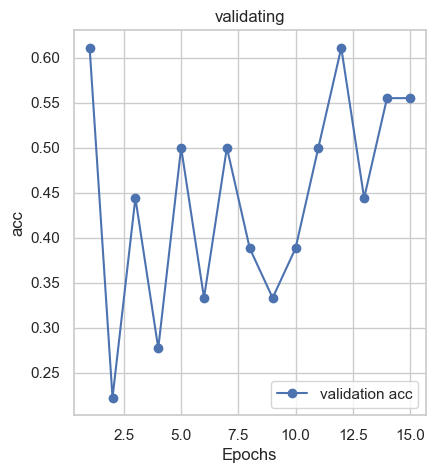

In [65]:
sns.set(style="whitegrid")

# Loss plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1,16),pt["acc"].to_list(), label='validation acc', marker='o')
plt.title('validating')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()